<a href="https://colab.research.google.com/github/Radha-12/AI_ML/blob/main/FMT_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FMT Project**





**Import Libraries:**

In [ ]:
# used to supress display of warnings
import warnings

# Pandas is used for data manipulation and analysis
import pandas as pd

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [ ]:
# Mount drive to access dataset and notebook from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Data Understanding:**

In [ ]:
# To read 1 CSV file as DataFrame and store them in a separate variable.
dfC = pd.read_csv('/content/drive/MyDrive/AI /Dec AI/FMT Project/signal-data.csv')

In [ ]:
dfC.head() # To get the first five rows/ instances of the dataframe

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
# To get the shapes of the dataframe
print(dfC.shape)

(1567, 592)


Found 1567 instances and 592 features in the dataframe.

In [ ]:
dfC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


*  There are null values that need to be treated.
*  Feature having object data type value be Time.
*  Feature having int data typevalue be Pass/Fail.
*  Features having float data type values be from 0 to 589.
*  We have 1567 instances and 592 column with memory usage is 7.1+ kB.

In [ ]:
dfC.dtypes

Time          object
0            float64
1            float64
2            float64
3            float64
              ...   
586          float64
587          float64
588          float64
589          float64
Pass/Fail      int64
Length: 592, dtype: object

*  Feature having object data type value be Time.
*  Feature having int data type value be Pass/Fail.
*  Features having float data type values be from 0 to 589.
*  We have 1567 instances and 592 column

In [ ]:
dfC.describe() # To get the five point summary

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [ ]:
# Creating copy of the dataframe
df=dfC.copy(deep = True)

**2.Data Cleaning:**

In [ ]:
# Check the missing/ null values
Null_values = df.isna().any()
print(Null_values) # print whether missing values are present or not for each variable

Time         False
0             True
1             True
2             True
3             True
             ...  
586           True
587           True
588           True
589           True
Pass/Fail    False
Length: 592, dtype: bool


Found there are null values in the df(dataset).

In [ ]:
# Print Feature-wise percentage of Null values
df.isna().sum()/len(df)

Time         0.000000
0            0.003829
1            0.004467
2            0.008934
3            0.008934
               ...   
586          0.000638
587          0.000638
588          0.000638
589          0.000638
Pass/Fail    0.000000
Length: 592, dtype: float64

Found null values with the percentage of the null values for each feature.

In [ ]:
# for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.
for column in df.columns:
        if df[column].isnull().sum() / len(df) >= 0.2 and column !='Time':
            df.drop(column, axis=1, inplace=True)
        elif df[column].dtype == 'object':
              df[column].fillna(df[column].mode()[0], inplace=True)
        else:
             df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 560 entries, Time to Pass/Fail
dtypes: float64(558), int64(1), object(1)
memory usage: 6.7+ MB


*  Feature having object data type value be Time.
*  Feature having int data typevalue be Pass/Fail.
*  Features having float data type values be from 0 to 559.
*  We have 1567 instances and 560 column with memory usage is 6.7+ kB.



In [ ]:
# Check the missing/ null values
df.isna().any()

Time         False
0            False
1            False
2            False
3            False
             ...  
586          False
587          False
588          False
589          False
Pass/Fail    False
Length: 560, dtype: bool

*  There are no null values that need to be treated.
*  Features got reduced to 560 from 592 on dropping the features with 1567 instances.

In [ ]:
# Print Feature-wise percentage of Null values
df.isnull().sum()/len(df)

Time         0.0
0            0.0
1            0.0
2            0.0
3            0.0
            ... 
586          0.0
587          0.0
588          0.0
589          0.0
Pass/Fail    0.0
Length: 560, dtype: float64

Found that there are no null values as the percentage of null values remains zero for all the features.

In [ ]:
df.describe() # To get the five point summary

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


**InSights:-**

*   Dropped features having more than ~20% of missing values.
*   Need to check feature importance first and take a call whether we can further reduce the number of features or not.

**Other methods for Dimensionality Reduction:-**

**A)** Dropping the features having zero standard deviation on checking their importance.

**B)**  Apply PCA for features/dimensionality reduction.

**C)**  Apply forward selection OR backward elimination method for feature selection.




In [ ]:
summary_point = df.describe() # To check the Mean, median, mode, std, Range, IQR and count statistical features

In [ ]:
summary_point

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


*   The above output prints the important summary statistics of all the numeric variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation.
*   Few features are reduntant like "5" , "13" because here all values are 100 and Standard deviation as 0 resepectively.
*   Pass/fail is the target feature
*   Most of the features have float values in different ranges. We need to the plot separate graphs to understand them.




**3. Data analysis & visualisation:**

In [ ]:
# Feature selection by dropping the columns/features with zero standard deviation columns or with having same value for all the rows
std = df.std(axis = 0)

<ipython-input-19-e24caf698d18>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = df.std(axis = 0)


In [ ]:
std[std==0].shape # To get the number of columns having zero standard deviation columns

(116,)

Found that there are 116 columns having the standard deviation as zero i.e features having same values for all the rows.

In [ ]:
# Drop the Zero standard deviation columns
zero_std_col = std[std == 0]
col_to_drop = zero_std_col.index.tolist()

In [ ]:
df_new = df.drop(columns= col_to_drop, axis =1)
df_new.shape # To print the columns after dropping the zero standard deviation columns

(1567, 444)

Found that there are 1567 instances and 444 features on droping the features with standard deviation as zero or features having same values for all the rows.

<ipython-input-23-fa1ffc35f5ba>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['1'], color = 'darkblue')
<ipython-input-23-fa1ffc35f5ba>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['2'], color = 'red')
<ipython-input-23-fa1ffc35f5ba>:14: UserWarning: 

`distplot` is a deprecated fu

Text(0.5, 1.0, 'Fourth Sensor Measurements')

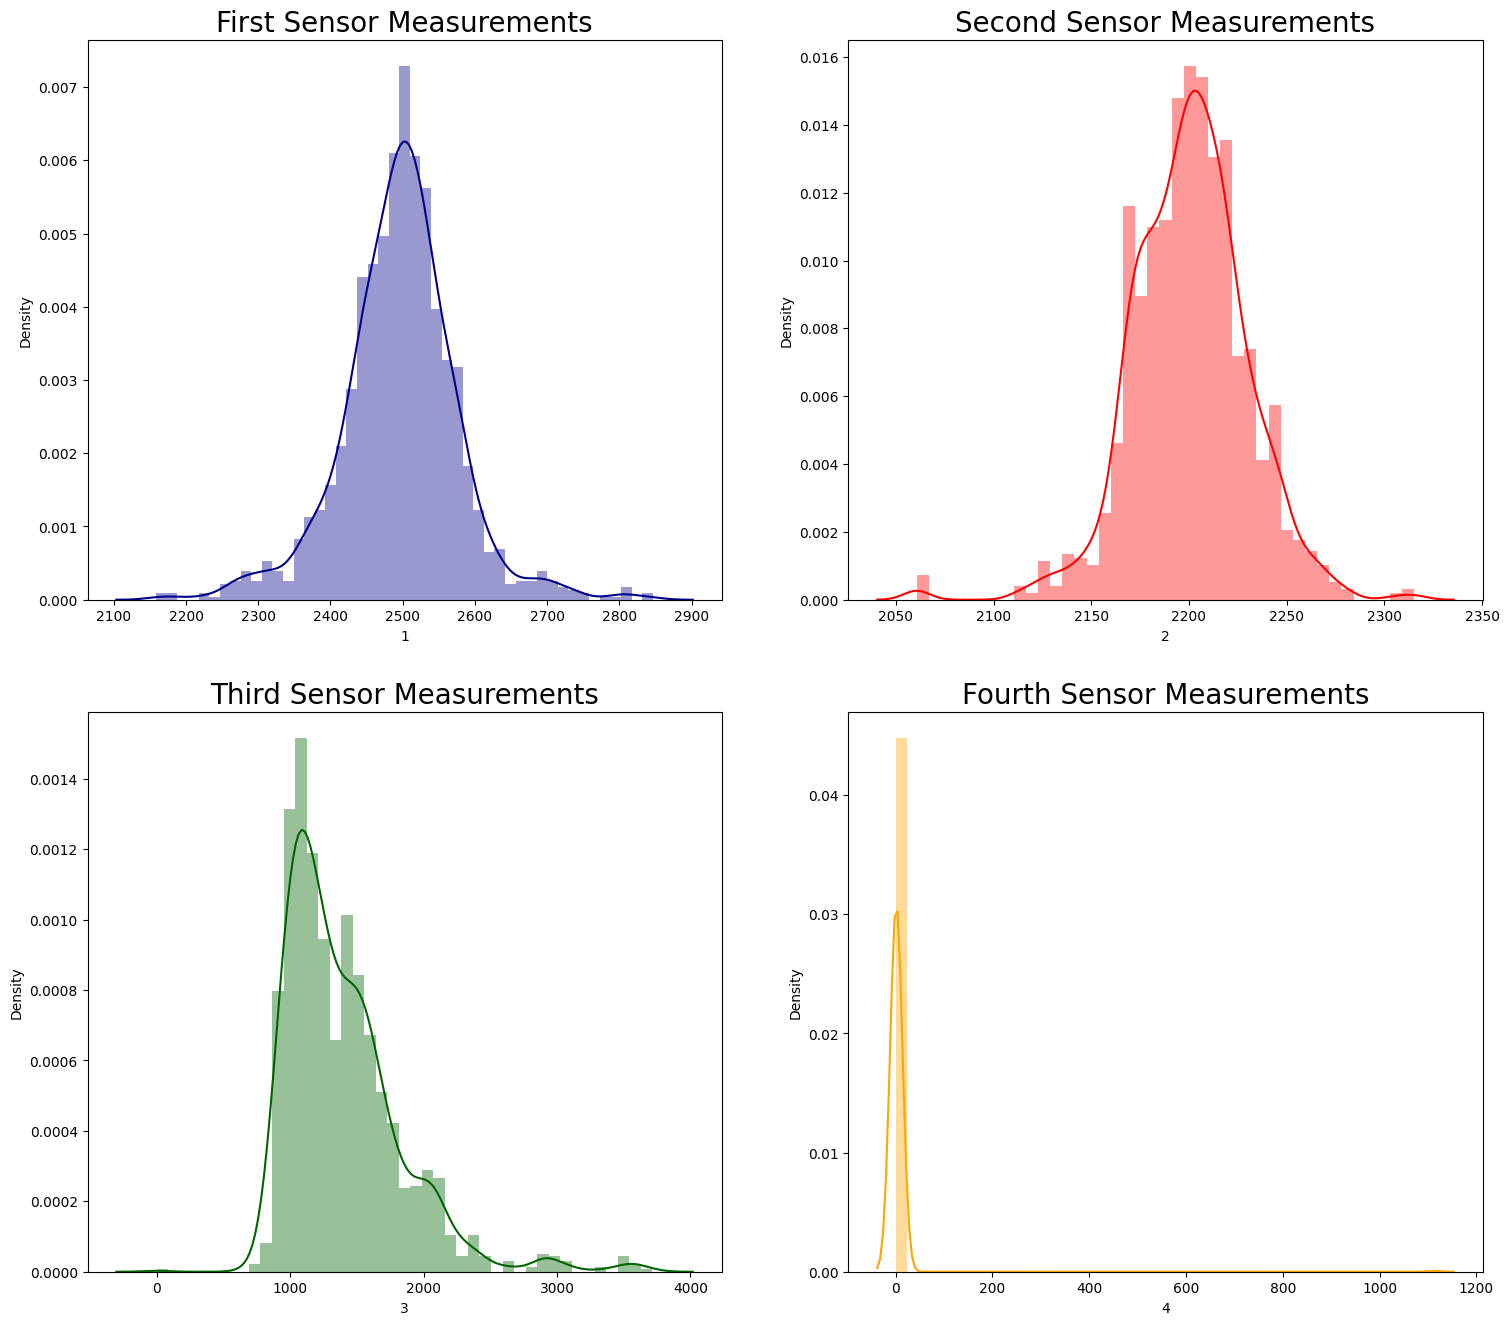

In [ ]:
# Univariate Analysis distribution plot for first four column's

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.distplot(df['1'], color = 'darkblue')
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
sns.distplot(df['2'], color = 'red')
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
sns.distplot(df['3'], color = 'darkgreen')
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
sns.distplot(df['4'], color = 'orange')
plt.title('Fourth Sensor Measurements', fontsize = 20)


*   Found features 1, 2 & 3 are quite normally distributed wheareas feature 4 is centred around zero and has a long tail toward right side(i.e skewed).




**Bivariate Analysis distribution plots**

<Axes: xlabel='2', ylabel='3'>

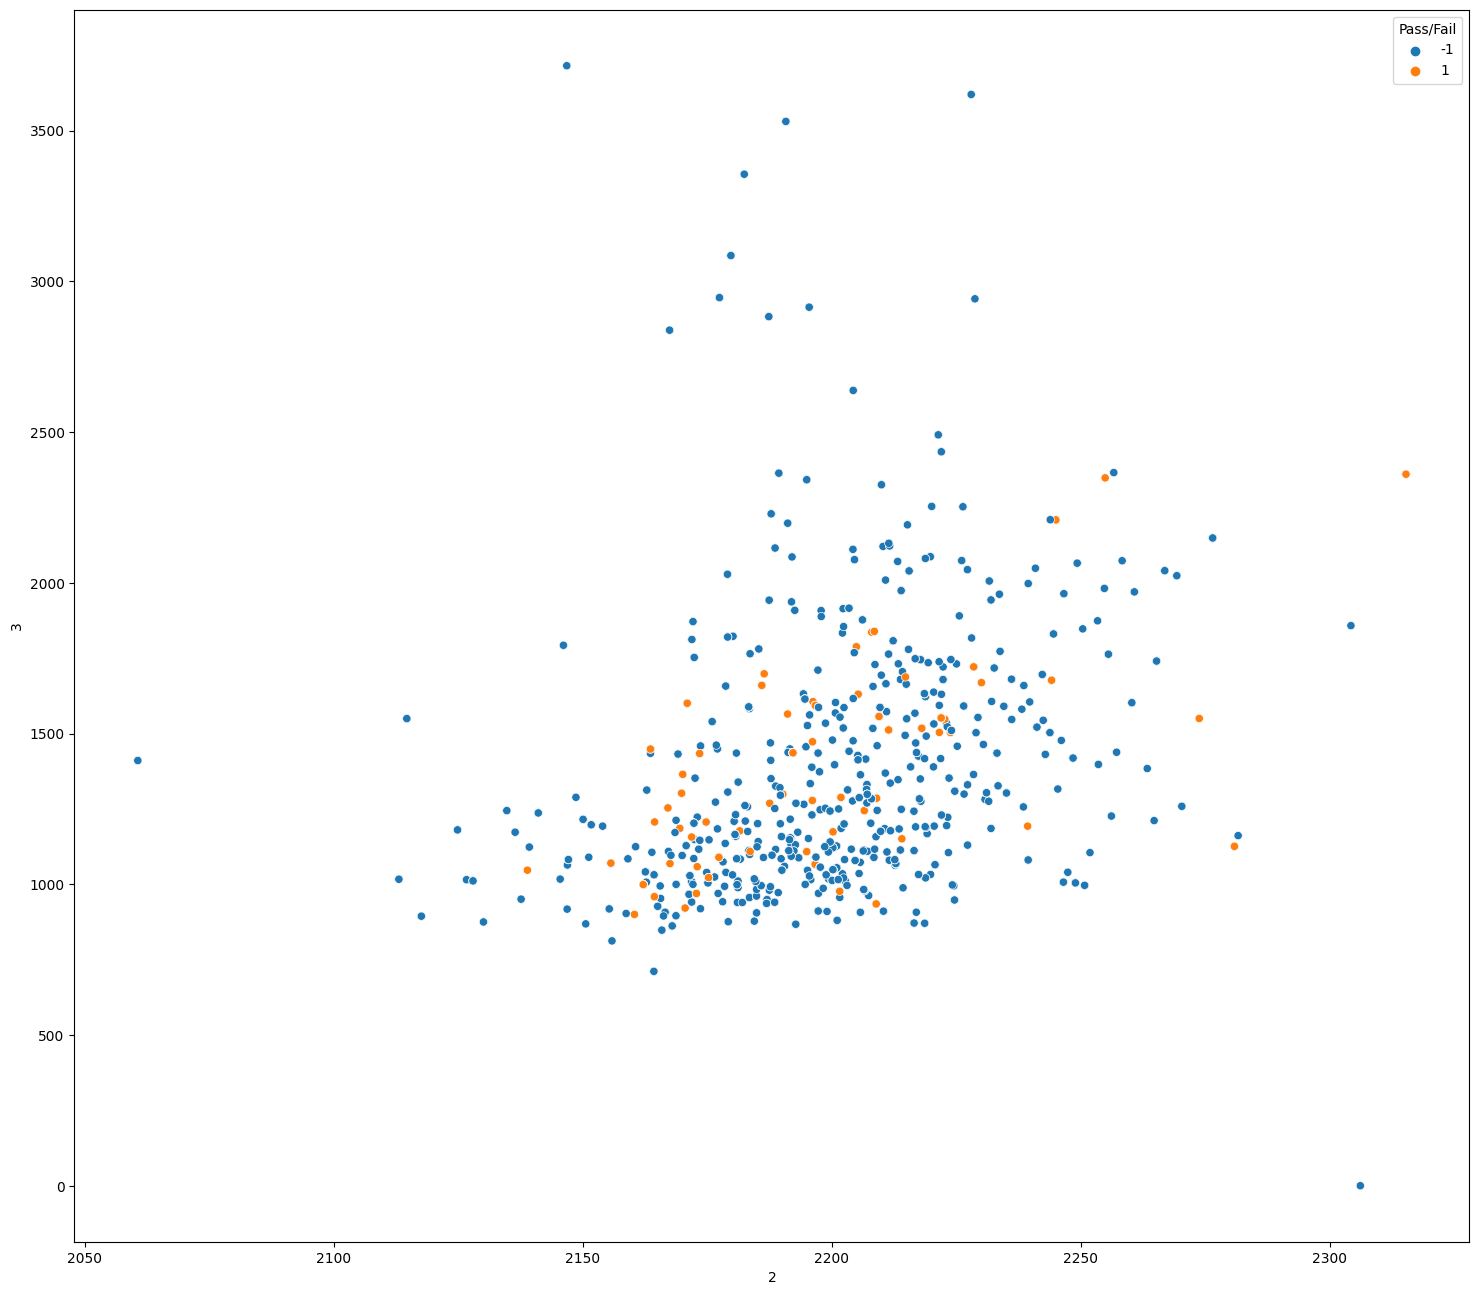

In [ ]:
# To visualize the scatterplot distinguished by colors
sns.scatterplot(data=df,x ='2',y ='3',hue=df['Pass/Fail'],palette='tab10')

**Observations:**

*   '2' is having positive linear relationship with '3'.
*   There are more Pass/Fail classes with -1 than 1.

<Axes: xlabel='588', ylabel='587'>

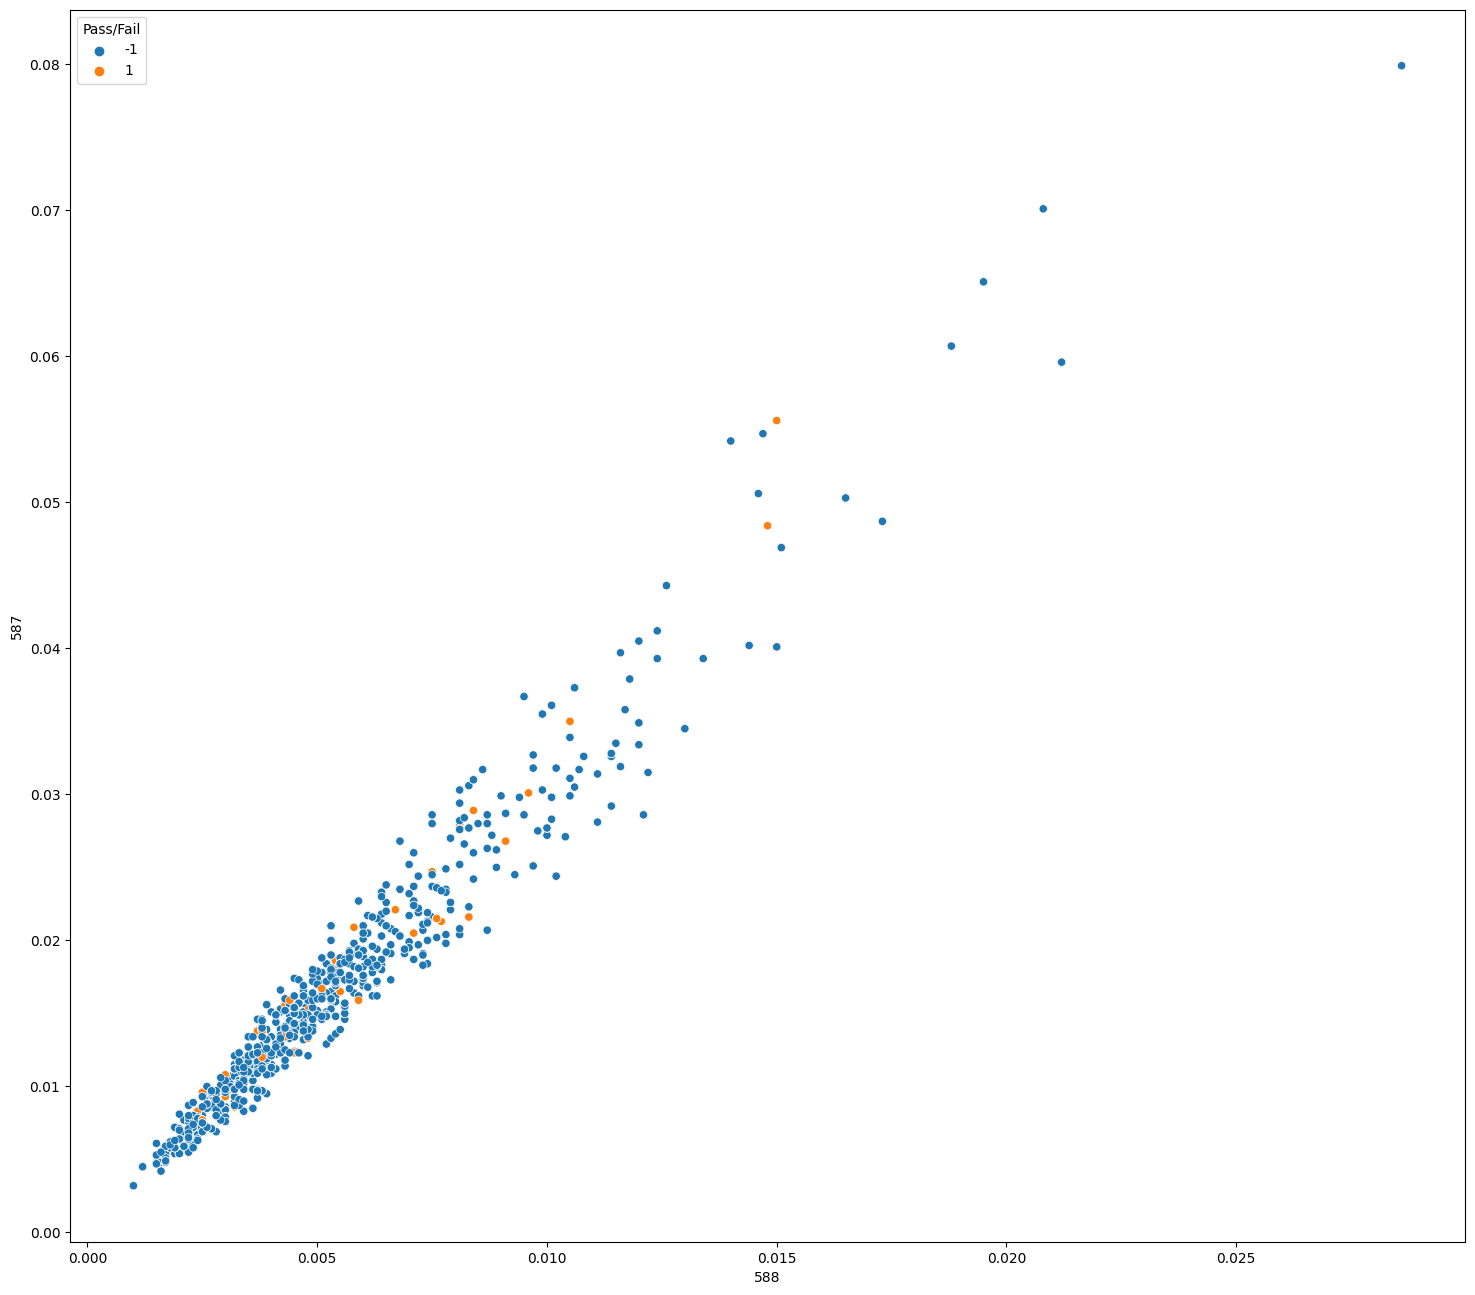

In [ ]:
# To visualize the scatterplot distinguished by colors
sns.scatterplot(data=df,x ='588',y ='587',hue=df['Pass/Fail'],palette='tab10')

**Observations:**

*   '588' is having strong positive linear relationship with '587'.
*   There are more Pass/Fail classes with -1 than 1.

**a) Multi-Variate Analysis using heatmap:**

<ipython-input-26-649d631f34b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


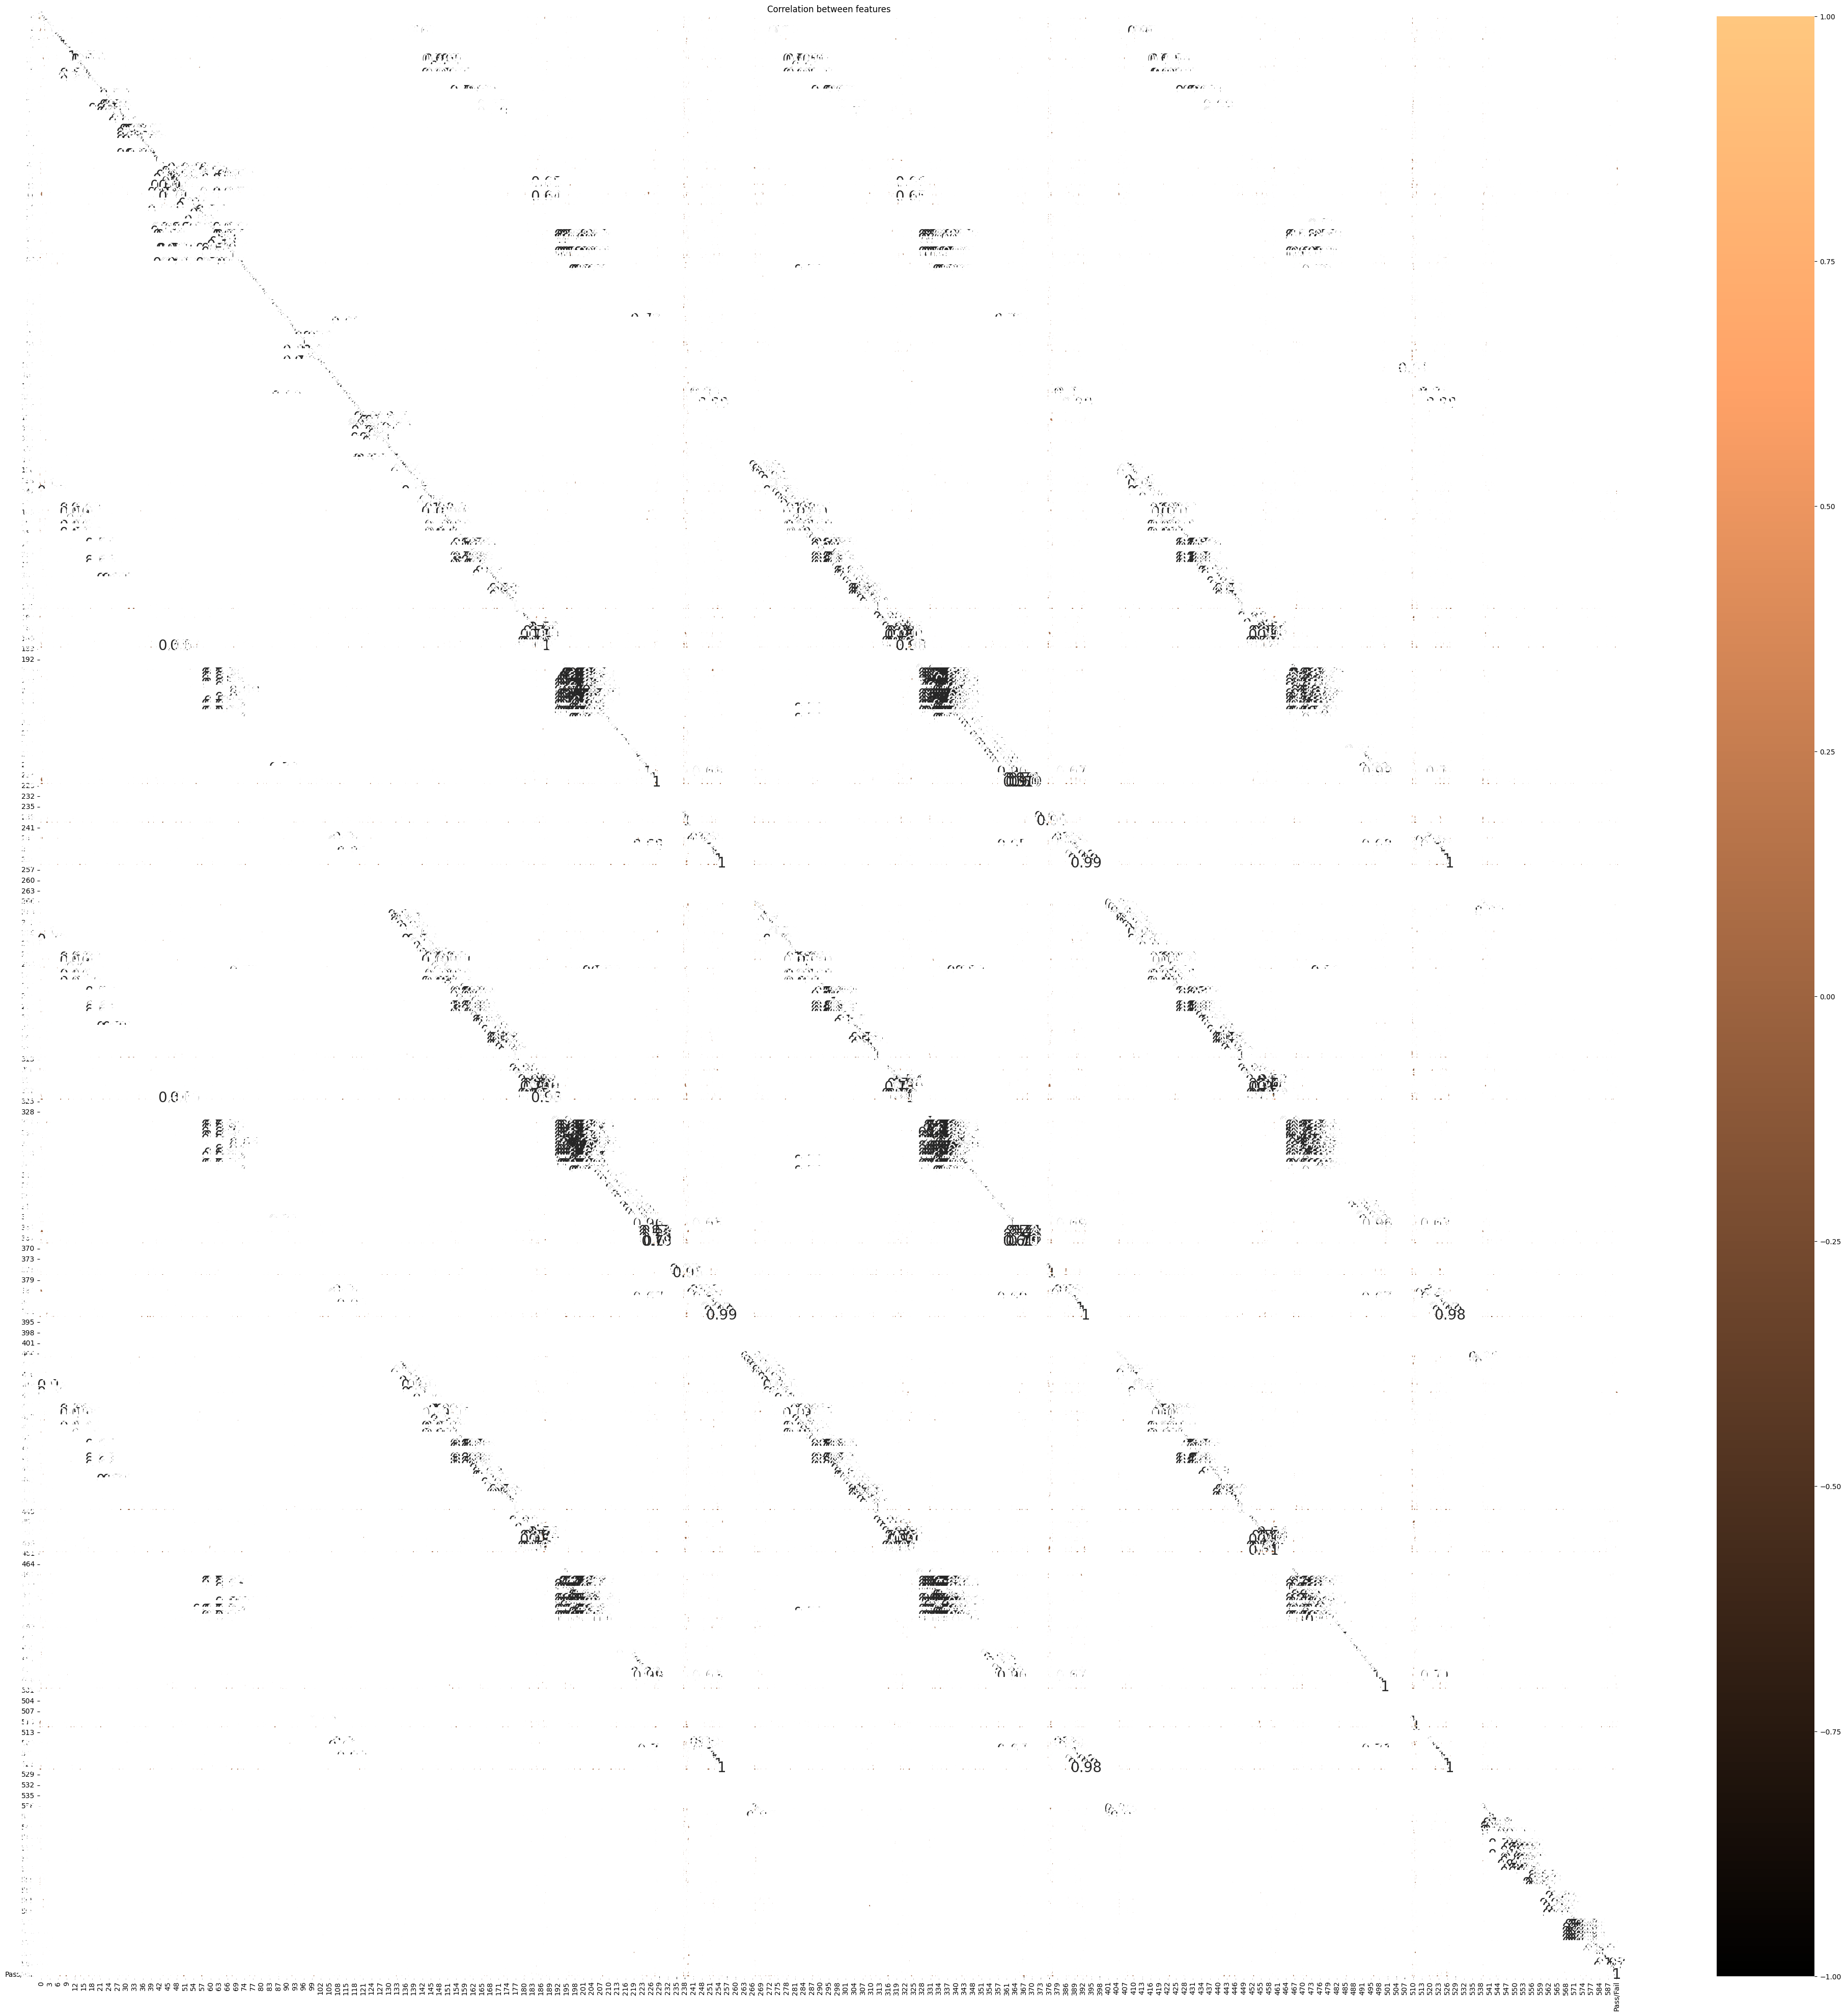

In [ ]:
# To get a correlation matrix
cor = df.corr()
# Ploting correlation plot
plt.figure(figsize=(50, 50))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the plot
# vmin: gives minimum range of values for the plot
# annot: prints the correlation values in the plot
# annot_kws={"size": 12}): Sets the font size of the annotation

sns.heatmap(cor, cmap='copper', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 20})

# specify name of the plot
plt.title('Correlation between features')
plt.show()

**InSights:-**
*   Found due to, too many features multivarite plot is messy.
*   Found black color at non-diagonal places which clearly indicates that there are correlated features.





**b) Multi-Variate Analysis using VIF(Variance Inflation Factor):**

In [ ]:
# vif(Variance Inflation Factor): measure of multicollinearity that exists in the set of variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

ind_var = df.iloc[:,1:559] # To get the independent variables/features

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = ind_var.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(ind_var.values, i)
                          for i in range(len(ind_var.columns))]

# Get the VIF values for all the features
print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    feature           VIF
0         0     14.369283
1         1      9.872951
2         2     27.298043
3         3     11.501601
4         4  42284.613134
..      ...           ...
553     585  10617.990034
554     586      2.434376
555     587     29.150856
556     588     28.499256
557     589      2.748894

[558 rows x 2 columns]


In [ ]:
# get the list of all the features having VIF values greater than or equal to 10
high_vif_features = vif_data[vif_data['VIF'] >= 10]['feature'].tolist()
high_vif_features

['0',
 '2',
 '3',
 '4',
 '11',
 '12',
 '14',
 '16',
 '17',
 '18',
 '19',
 '21',
 '22',
 '25',
 '26',
 '27',
 '28',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '50',
 '51',
 '53',
 '54',
 '56',
 '57',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '70',
 '74',
 '86',
 '89',
 '90',
 '92',
 '93',
 '94',
 '96',
 '98',
 '99',
 '100',
 '104',
 '105',
 '106',
 '114',
 '115',
 '117',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '127',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '140',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '150',
 '151',
 '152',
 '153',
 '154',
 '155',
 '156',
 '159',
 '160',
 '161',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '170',
 '171',
 '172',
 '173',
 '174',
 '175',
 '176',
 '177',
 '180',
 '181',
 '182',
 '183',
 '184',
 '185',
 '187',
 '188',
 '195',
 '196',
 '197',
 '198',
 '199',
 '200',
 '201',
 '202',
 '203',

In [ ]:
# get the count of all VIF values greater than or equal to 10
print(len(high_vif_features))

366


**InSights:-**
*   Found 366 features, having high multicollinearity with other independent features. Hence, these columns can be dropped.
*   Need to check the feature importance for dropping the columns.

**4. Data pre-processing:**

In [ ]:
# Split the predictors and target attributes i.e X, y

# Select independent features for model building.
X = df.drop(['Pass/Fail', 'Time'], axis=1)

y = df['Pass/Fail']

# split data into train subset and test subset
# stratify : returns training and test subsets that have the same proportions of class labels as the input dataset or preserves the porportion of target as in original dataset for both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )

# checking the dimensions of the train & test subset
# to print dimension of train set
print(X_train.shape)
# to print dimension of test set
print(X_test.shape)

(1096, 558)
(471, 558)


*   There are 1096 instances and 558 columns in X_train data set.
*   There are 471 instances and 558 columns in X_test data set.



In [ ]:
X_train.head() # To print the firstfive rows of the X_train set

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
594,3042.70,2355.11,2242.8555,1430.7270,0.8832,100.0,106.2100,0.1216,1.4817,0.0030,...,1.5148,15.9361,0.4937,0.0153,0.0034,3.0907,0.0256,0.0189,0.0060,73.8657
1380,3093.31,2456.82,2207.9555,1283.4368,1.8467,100.0,95.4022,0.1216,1.4198,-0.0156,...,2.0854,23.2820,0.4988,0.0126,0.0032,2.5209,0.0203,0.0134,0.0038,65.9827
1064,2981.49,2536.82,2147.1111,1081.8758,1.3550,100.0,103.2778,0.1226,1.6075,0.0095,...,1.7051,12.3064,0.4983,0.0093,0.0026,1.8592,0.0189,0.0059,0.0017,31.0252
1109,2885.80,2607.01,2231.9555,1943.0435,1.2758,100.0,96.8789,0.1224,1.4912,0.0001,...,1.7051,12.3064,0.4953,0.0131,0.0030,2.6379,0.0831,0.0198,0.0078,23.8407
774,3070.63,2377.97,2130.0556,874.9165,1.2545,100.0,105.9011,0.1253,1.4374,-0.0117,...,1.4410,16.6894,0.5013,0.0111,0.0026,2.2141,0.0373,0.0079,0.0030,21.0599


**Check for target balancing and balance the imblanced target class('Pass/Fail') using SMOTE algorithm**

In [ ]:
# To get the target feature 'Pass/Fail' instances with unique values
df['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

<Axes: ylabel='Pass/Fail'>

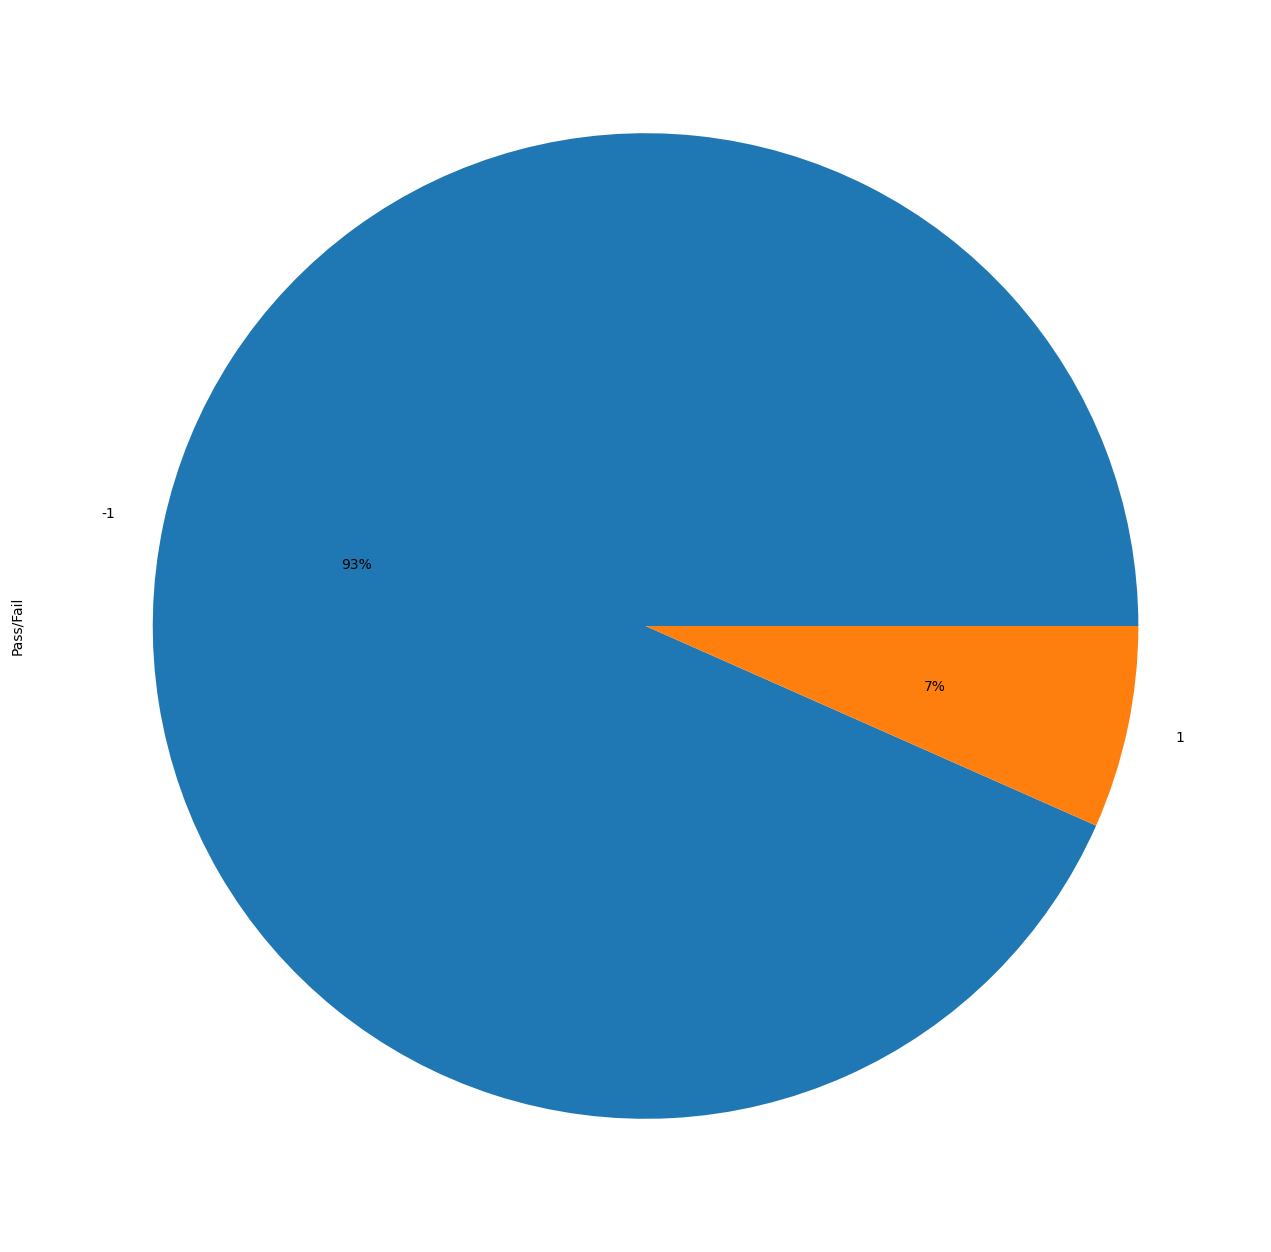

In [ ]:
# To plot the target feature 'Pass/Fail' instances with unique values using Bar plot
df['Pass/Fail'].value_counts().plot(kind='pie' ,autopct='%.0f%%')

For 'Pass/Fail' feature, found unique value as '-1' with 93% and unique value as '1' with 7% from the given data.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '-1': {} \n".format(sum(y_train==-1)))

Before OverSampling, counts of label '1': 73
Before OverSampling, counts of label '-1': 1023 



In [ ]:
from imblearn.over_sampling import SMOTE # using SMOTE algorithm to balance the data

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (2046, 558)
After OverSampling, the shape of train_y: (2046,) 



In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '-1': {}".format(sum(y_train_res==-1)))

After OverSampling, counts of label '1': 1023
After OverSampling, counts of label '-1': 1023


In [ ]:
y_test.value_counts() # To get the label counts of the test set

-1    440
 1     31
Name: Pass/Fail, dtype: int64


For 'Pass/Fail' feature in test set, found unique value as '-1' are 440 and unique value as '1' are 31 from the given data.

In [ ]:
# To Standardize/ Normalise the data

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(X_train_res)
x_test = sc.transform(X_test)

In [ ]:
# statistical characteristics for the original data set i.e 5-point summary
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,16.642363,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.480613,80.227793,29.380932,439.712852,56.103066,0.0,6.209271,0.008936,0.073849,0.015107,...,12.485267,0.003403,0.017174,0.003719,3.576891,0.012354,0.008805,0.002866,93.861936,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,4.582000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,11.501550,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,-1.000000
50%,3011.840000,2498.910000,2200.955600,1287.353800,1.317100,100.0,101.492200,0.122400,1.461600,-0.001300,...,13.817900,0.500200,0.013800,0.003600,2.757700,0.020500,0.014800,0.004600,72.023000,-1.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.529600,100.0,104.530000,0.123800,1.516850,0.008400,...,17.080900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [ ]:
# statistical characteristics for the resampled X_train data set i.e 5-point summary
X_train_res.describe()

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.0,2046.000000,2046.000000,2046.000000,2046.000000,...,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000
mean,3006.489964,2500.998525,2201.463494,1386.559504,2.427920,100.0,101.188524,0.122010,1.469286,-0.002769,...,5.110195,15.371203,0.500042,0.015583,0.003908,3.119389,0.021847,0.017311,0.005557,103.594880
std,72.176764,71.502272,27.379963,367.764111,34.722682,0.0,5.405878,0.006289,0.063578,0.013433,...,14.905316,9.382901,0.003234,0.015140,0.003283,3.151364,0.011658,0.008313,0.002653,83.805940
min,2743.240000,2162.870000,2060.660000,711.025800,0.681500,100.0,82.131100,0.000000,1.200500,-0.041000,...,0.898700,4.582000,0.477800,0.006500,0.002000,1.284500,-0.016900,0.003200,0.001000,0.000000
25%,2956.662348,2463.208094,2184.450436,1110.760830,1.068407,100.0,98.592158,0.121198,1.430636,-0.010875,...,1.441000,11.384862,0.498069,0.011933,0.003190,2.389183,0.014348,0.011500,0.003700,50.600975
50%,2997.382740,2503.390000,2199.791954,1322.038012,1.323813,100.0,101.154223,0.122200,1.467958,-0.002585,...,1.675259,13.666933,0.500200,0.014200,0.003687,2.838795,0.021064,0.015900,0.005072,79.775200
75%,3046.555000,2538.377500,2217.000000,1578.835810,1.518800,100.0,103.929253,0.123400,1.513255,0.004514,...,1.910700,16.346500,0.502075,0.016900,0.004200,3.383614,0.027890,0.021297,0.006900,125.126443
max,3356.350000,2846.440000,2315.266700,3715.041700,1112.160000,100.0,129.252200,0.128600,1.656400,0.060900,...,90.423500,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [ ]:
# statistical characteristics for the X_test data set i.e 5-point summary
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,576,577,582,583,584,585,586,587,588,589
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.0,471.000000,471.000000,471.000000,471.000000,...,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3018.147146,2492.569492,2201.763420,1402.650974,6.071317,100.0,101.056154,0.121595,1.460357,0.000168,...,5.869016,16.815503,0.500242,0.014750,0.003711,2.948469,0.020611,0.016849,0.005402,102.869498
std,75.371915,79.245997,28.758001,455.877662,72.396492,0.0,6.069961,0.009932,0.073537,0.014821,...,18.047112,13.164341,0.003268,0.005406,0.001009,1.078295,0.011535,0.009724,0.003166,94.235121
min,2792.240000,2158.750000,2060.660000,0.000000,0.721700,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.663600,5.098600,0.491500,0.006000,0.001700,1.197500,-0.006000,0.003200,0.001000,0.000000
25%,2971.895000,2451.960000,2180.794450,1089.365500,1.019000,100.0,97.917800,0.120900,1.410650,-0.009950,...,1.396600,11.486300,0.497950,0.011500,0.003100,2.300850,0.012950,0.010450,0.003300,47.072200
50%,3014.452896,2497.490000,2203.166700,1283.436800,1.299800,100.0,101.566700,0.122200,1.458700,-0.000500,...,1.624500,13.897900,0.500300,0.013900,0.003600,2.779600,0.019800,0.014800,0.004700,72.109400
75%,3062.850000,2533.855000,2219.766700,1590.741600,1.517400,100.0,104.601150,0.123800,1.510850,0.008600,...,1.910700,17.052750,0.502600,0.016400,0.004100,3.284950,0.027400,0.020700,0.006500,122.024450
max,3299.400000,2806.910000,2306.100000,3619.739700,1114.536600,100.0,129.252200,0.127600,1.653900,0.074900,...,88.177400,96.960100,0.508800,0.046000,0.009700,9.167700,0.079800,0.079900,0.028600,737.304800


**Overall InSights:-**
*   Found that the test data is quite similar to the original dataframe.
*   **Analyzing resampled train data:** Found that mean is quite similar to the original dataframe. But there is some difference in the standard deviation for  few features. Need to perform further statistical analysis to confirm if there is any significant difference in the data or not.






**Using Logistic Regression Model:**

In [ ]:

lr = LogisticRegression(C = 1000, penalty = 'l2')
# fit the model on x_train and y_train_res using fit()
lr.fit(x_train, y_train_res)
# Get the x_test set predicted values
y_pred_lr = lr.predict(x_test)
# To print the accuracy of the model
print('accuracy score:', accuracy_score(y_pred_lr, y_test))

accuracy score: 0.861995753715499


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# To print the Classification Report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

          -1       0.95      0.90      0.92       440
           1       0.19      0.32      0.24        31

    accuracy                           0.86       471
   macro avg       0.57      0.61      0.58       471
weighted avg       0.90      0.86      0.88       471



In [ ]:
# To print the Confusion Matrix
cm = confusion_matrix(y_pred_lr, y_test)
cm

array([[396,  21],
       [ 44,  10]])

Confusion Matrix values lists below:
*   TP: 396
*   FP: 44
*   TN: 10
*   FN: 21

In [ ]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# import function for ridge regression
from sklearn.linear_model import RidgeClassifier

tuned_paramaters = [{'alpha':[7, 8, 9, 10, 11]}]

# instantiate the Ridge() method
ridge = RidgeClassifier()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
ridge_grid = GridSearchCV(estimator = ridge,
                          param_grid = tuned_paramaters,
                          cv = 5)

# fit the model on x_train and y_train_res using fit()
ridge_grid.fit(x_train, y_train_res)

# get the best parameters
print('Best parameters for Ridge Regression:', ridge_grid.best_params_)

Best parameters for Ridge Regression: {'alpha': 7}


In [ ]:
# Get the x_test set predicted values
y_pred_ridge_grid = ridge_grid.predict(x_test)
# To print the accuracy of the model
print('accuracy score:', accuracy_score(y_pred_ridge_grid, y_test))

accuracy score: 0.832271762208068


In [ ]:
print(classification_report(y_test, y_pred_ridge_grid)) # To print the Classification Report

              precision    recall  f1-score   support

          -1       0.96      0.85      0.90       440
           1       0.21      0.55      0.30        31

    accuracy                           0.83       471
   macro avg       0.59      0.70      0.60       471
weighted avg       0.91      0.83      0.86       471



In [ ]:
# To print the Confusion Matrix
cm_ridge_grid = confusion_matrix(y_pred_ridge_grid, y_test)
cm_ridge_grid

array([[375,  14],
       [ 65,  17]])

In [ ]:
lr_rc = RidgeClassifier(alpha=7)
lr_rc.fit(x_train, y_train_res) # To fit the model with x_train and y_train_res using fit()

y_pred_lr_rc = lr_rc.predict(x_test) # To predict the x_test values

print('accuracy score', accuracy_score(y_pred_lr_rc, y_test)) # To print the Classification Report
cm = confusion_matrix(y_pred_lr_rc, y_test) # To print the Confusion Matrix
cm

accuracy score 0.832271762208068


array([[375,  14],
       [ 65,  17]])

Confusion Matrix values lists below:
*   TP: 375
*   TN: 17
*   FP: 65
*   FN: 14



**Using Random Forest Model:**

In [ ]:
forest = RandomForestClassifier() # Train the model using Random Forest
forest.fit(x_train, y_train_res) # Fit the model on x_train and y_train_res using fit()

y_pred_rf = forest.predict(x_test) # Get the x_test set predicted values
print('accuracy score', accuracy_score(y_pred_rf, y_test)) # To get the accuracy of the model

accuracy score 0.9320594479830149


In [ ]:
print('Classification Report', classification_report(y_pred_rf, y_test))

Classification Report               precision    recall  f1-score   support

          -1       1.00      0.93      0.96       470
           1       0.00      0.00      0.00         1

    accuracy                           0.93       471
   macro avg       0.50      0.47      0.48       471
weighted avg       1.00      0.93      0.96       471



In [ ]:
cm = confusion_matrix(y_pred_rf, y_test)
cm

array([[439,  31],
       [  1,   0]])

Confusion Matrix values lists below:
*   TP: 439
*   TN: 0
*   FP: 1
*   FN: 31

**Using GridSearch CV Algorithm:**

In [ ]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators= 50, criterion= 'gini')

# making a parameters list
parameters = {
    'max_depth' : [10, 50, 100, 150],
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3]}

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'f1', cv = 3, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train_res)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

predictions = grid_search.predict(x_test)

print("Best Accuracy: ", best_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Accuracy:  0.9936540062830498


In [ ]:
print("Best Parameter: ", best_parameters) # Get the best parameters

Best Parameter:  {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
print('Classification Report',classification_report(predictions, y_test)) # To print the classification report

Classification Report               precision    recall  f1-score   support

          -1       1.00      0.94      0.97       469
           1       0.03      0.50      0.06         2

    accuracy                           0.93       471
   macro avg       0.51      0.72      0.51       471
weighted avg       0.99      0.93      0.96       471



In [ ]:
model = RandomForestClassifier(n_estimators= 50, criterion= 'gini', max_depth= 150, min_samples_leaf= 1, min_samples_split = 2)# Train the model using Random Forest
model.fit(x_train, y_train_res) # Fit the model on x_train and y_train_res using fit()

y_pred_rfc = model.predict(x_test) # # Get the x_test set predicted values

print('accuracy score', accuracy_score(y_pred_rfc, y_test)) # To get the accuracy of the model

accuracy score 0.9278131634819533


In [ ]:
print('Classification Report',classification_report(y_pred_rfc, y_test))

Classification Report               precision    recall  f1-score   support

          -1       0.99      0.93      0.96       468
           1       0.00      0.00      0.00         3

    accuracy                           0.93       471
   macro avg       0.50      0.47      0.48       471
weighted avg       0.99      0.93      0.96       471



In [ ]:
cm = confusion_matrix(y_pred_rfc, y_test)
cm

array([[437,  31],
       [  3,   0]])

Confusion Matrix values lists below:
*   TP: 438
*   TN: 1
*   FP: 2
*   FN: 30

In [ ]:
# To check the feature importance
features= df.columns
importances = model.feature_importances_ # To get the feature(s) importance
indices = np.argsort(importances) # To sort the indices
# To print the features importance score
for i,v in enumerate(importances):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00069
Feature: 1, Score: 0.00071
Feature: 2, Score: 0.00108
Feature: 3, Score: 0.00139
Feature: 4, Score: 0.00095
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00118
Feature: 7, Score: 0.00114
Feature: 8, Score: 0.00427
Feature: 9, Score: 0.00493
Feature: 10, Score: 0.00148
Feature: 11, Score: 0.00103
Feature: 12, Score: 0.00111
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00127
Feature: 15, Score: 0.00149
Feature: 16, Score: 0.00258
Feature: 17, Score: 0.00139
Feature: 18, Score: 0.00124
Feature: 19, Score: 0.00151
Feature: 20, Score: 0.00277
Feature: 21, Score: 0.00353
Feature: 22, Score: 0.00214
Feature: 23, Score: 0.00137
Feature: 24, Score: 0.00213
Feature: 25, Score: 0.00146
Feature: 26, Score: 0.00135
Feature: 27, Score: 0.00183
Feature: 28, Score: 0.00235
Feature: 29, Score: 0.00226
Feature: 30, Score: 0.00201
Feature: 31, Score: 0.00925
Feature: 32, Score: 0.00086
Feature: 33, Score: 0.00497
Feature: 34, Score: 0.00113
Feature: 35, Score: 0.00085
Fe

Text(0.5, 0, 'Relative Importance')

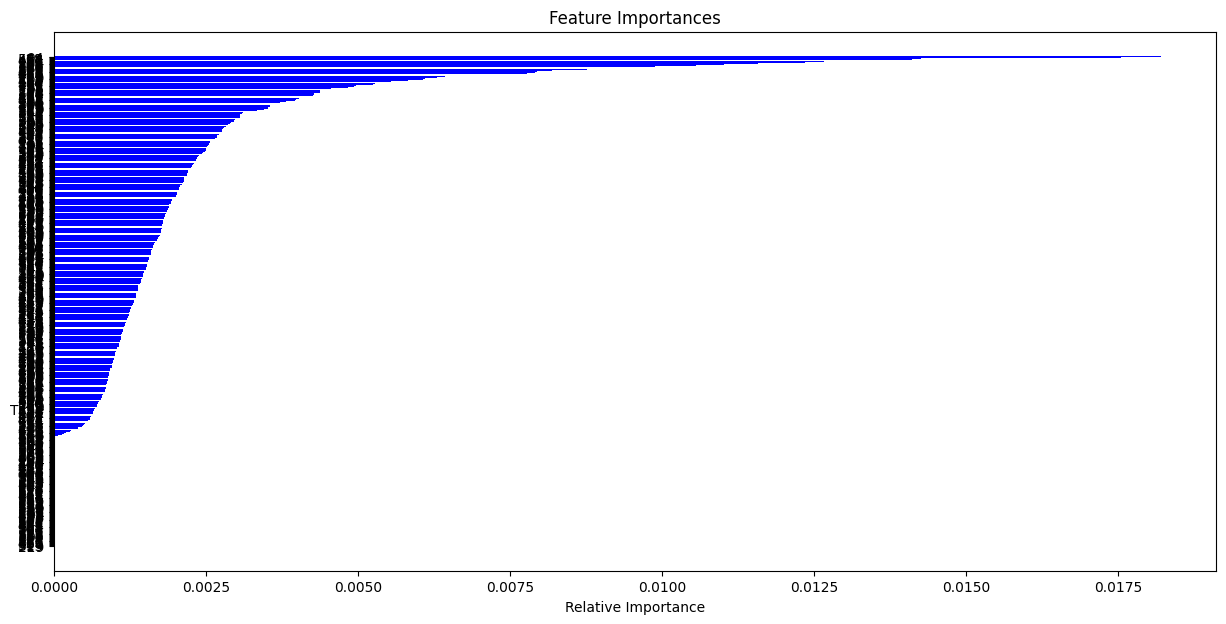

In [ ]:
# To plot a plot between the Relative Importance and dataframe features/columns indices
plt.figure(figsize= (15,7))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

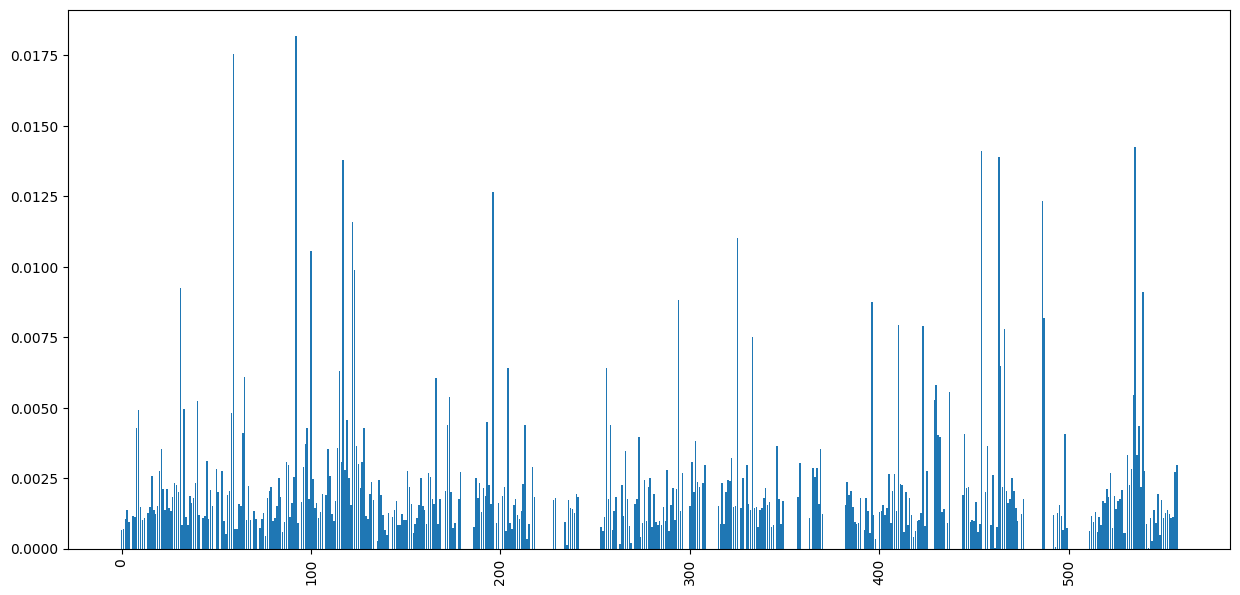

In [ ]:
# summarize feature importance
importance = model.feature_importances_

# plot feature importance
plt.figure(figsize= (15,7))
pyplot.bar([x for x in range(len(importance))], importance)
plt.xticks(rotation=90)
pyplot.show()

* Most of the features are having less importance.

In [ ]:
feature_df = pd.DataFrame(importance, index=X_train.columns)
feature_df.shape

(558, 1)

In [ ]:
importance.nonzero()

(array([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  43,  44,  45,  46,  47,  48,  50,  51,  53,  54,  55,  56,
         57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  70,
         71,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  97,  98,
         99, 100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139,
        140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
        154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 171, 172, 173, 174, 175, 176, 178, 179, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 195, 196, 198

In [ ]:
df.head() # To print the first 5 rows of the data frame

,Time,0,1,2,3,4,5,6,7,8,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


**Using Principal Component Analysis for Feature Selection:**

In [ ]:
# Splitting the data into Predictor and Target attributes
Predictors = df.drop(['Time', 'Pass/Fail'], axis=1)
target = df['Pass/Fail']

In [ ]:
# split data into train subset and test subset
X_train, X_test, y_train, y_test = train_test_split(Predictors, target, test_size=0.3, random_state=42, stratify=target )

In [ ]:
# To standardize/Normalize the data

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

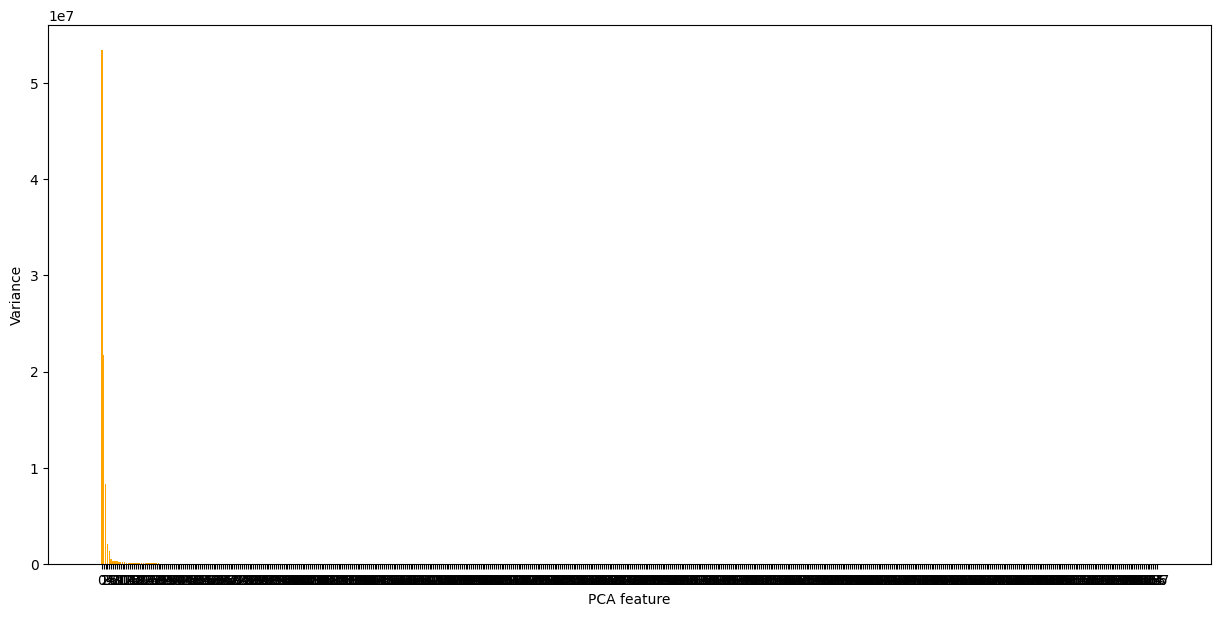

In [ ]:
# Import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=123)
# To fit the model on predictors attributes
pca.fit(Predictors)

features = range(pca.n_components_)

plt.figure(figsize=(15,7))
plt.bar(features, pca.explained_variance_, color='orange')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()

In [ ]:
# Taking n_components as 50
pca = PCA(n_components=50)
dim_red = pca.fit_transform(x_train_sc)
target_attr = pca.transform(x_test_sc)

In [ ]:
model = RandomForestClassifier(n_estimators= 50, criterion= 'gini', max_depth= 100) # Train the model using Random Forest
model.fit(dim_red, y_train) # To fit the model on dim_set and y_train using fit()

y_pred_rf = model.predict(target_attr) # Get the predicted values of targer_attr set

print('accuracy score', accuracy_score(y_pred_rf, y_test)) # To the accuracy of the model

accuracy score 0.9278131634819533


In [ ]:
print('Classification Report', classification_report(y_pred_rf, y_test)) # To print the classification report

Classification Report               precision    recall  f1-score   support

          -1       0.99      0.93      0.96       468
           1       0.00      0.00      0.00         3

    accuracy                           0.93       471
   macro avg       0.50      0.47      0.48       471
weighted avg       0.99      0.93      0.96       471



In [ ]:
print('confusion_matrix', confusion_matrix(y_pred_rf, y_test)) # To print the confusion matrix

confusion_matrix [[437  31]
 [  3   0]]


Confusion Matrix values lists below:
*   TP: 437
*   TN: 0
*   FP: 3
*   FN: 31


**To compare all the designed models with their accuracies:**

**A) Using KNeighborsClassifier:**

In [ ]:
# To train the model using Knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
myList = list(range(2,15))

neighbors = KNeighborsClassifier()

ac_scores = []

# perform accuracy metrics for values from 1,3,5....15
for k in myList:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train_res) # To fit the model of x_train an y_train_res using fit()
  y_pred = knn.predict(x_test)
  scores = accuracy_score(y_test, y_pred) # Get the accuracy score
  ac_scores.append(scores)
  MSE = [1 - x for x in ac_scores]
  optimal_k = myList[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 2


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train, y_train_res) # To fit the model of x_train and y_train_res using fit()

y_pred_knn = knn.predict(x_test) # To get the x_test predicted values

print('accuracy score', accuracy_score(y_pred_knn, y_test)) # Get the accuracy score

accuracy score 0.5520169851380042


In [ ]:
print('Classification Report', classification_report(y_pred_knn, y_test))

Classification Report               precision    recall  f1-score   support

          -1       0.55      0.95      0.70       253
           1       0.61      0.09      0.15       218

    accuracy                           0.55       471
   macro avg       0.58      0.52      0.42       471
weighted avg       0.58      0.55      0.44       471



In [ ]:
cm = confusion_matrix(y_pred_knn, y_test)
cm

array([[241,  12],
       [199,  19]])

Confusion Matrix values lists below:
*   TP: 241
*   TN: 19
*   FP: 199
*   FN: 12

**B) Using GradientBoostingClassifier:**

In [ ]:
# To train the model using GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=100, random_state=0)

gb.fit(x_train, y_train_res) # To fit the model of x_train and y_train_res using fit()

y_pred_gb = gb.predict(x_test) # To predict the x_test values

print('accuracy score', accuracy_score(y_pred_gb, y_test)) # To print the accuracy of the model

accuracy score 0.861995753715499


In [ ]:
print(classification_report(y_pred_gb, y_test)) # To print the classification report

              precision    recall  f1-score   support

          -1       0.91      0.94      0.92       425
           1       0.19      0.13      0.16        46

    accuracy                           0.86       471
   macro avg       0.55      0.54      0.54       471
weighted avg       0.84      0.86      0.85       471



In [ ]:
cm = confusion_matrix(y_pred_gb, y_test) # To get the confusion matrix
cm

array([[400,  25],
       [ 40,   6]])

Confusion Matrix values lists below:
*   TP: 400
*   TN: 6
*   FP: 40
*   FN: 25

**Tuning GradientBoostingClassifier parameters using GridSearch CV:**

In [ ]:
model = GradientBoostingClassifier(n_estimators= 100)

# making a parameters list
parameters = {
    'max_depth' : [10, 50],
    'max_features' : [5,10]}

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 3, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train_res)

# get best accuracy of the model
best_accuracy = grid_search.best_score_

In [ ]:
# get best parameters
best_parameters = grid_search.best_params_
# get the predicted vlues of x_test
predictions = grid_search.predict(x_test)
# To print Best Accuracy and Best Parameter
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.9975562072336266
Best Parameter:  {'max_depth': 50, 'max_features': 5}


In [ ]:
# get classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       440
           1       0.00      0.00      0.00        31

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(predictions, y_test)
cm

array([[440,  31],
       [  0,   0]])

Confusion Matrix values lists below:
*   TP: 439
*   TN: 0
*   FP: 1
*   FN: 31

In [ ]:
# To train the model using GradientBoostingClassifier with best parameters
gb = GradientBoostingClassifier(n_estimators=10, max_depth=10, max_features=5, learning_rate=1.0, random_state=0)

gb.fit(x_train, y_train_res) # To fit the model of x_train and y_train_res using fit()

y_pred_gb = gb.predict(x_test) # To predict the x_test values

print('accuracy score', accuracy_score(y_pred_gb, y_test)) # To print the accuracy of the model

accuracy score 0.89171974522293


In [ ]:
print(classification_report(y_pred_gb, y_test))

              precision    recall  f1-score   support

          -1       0.95      0.94      0.94       447
           1       0.06      0.08      0.07        24

    accuracy                           0.89       471
   macro avg       0.51      0.51      0.51       471
weighted avg       0.90      0.89      0.90       471



In [ ]:
cm = confusion_matrix(y_pred_gb, y_test)
cm

array([[418,  29],
       [ 22,   2]])

Confusion Matrix values lists below:
*   TP: 418
*   TN: 2
*   FP: 22
*   FN: 29

**Observations for all the designed models:**
- KNN Model having poor accuracy with 55.20% eventhough able to predict both majority and minority classes.
- LogisticRegression having good accuracy with 83.22% and able to predict both majority and minority classes.
- Random forest having accuracy with 93.20% and biased towards majority class.
- Gradient boosting having accuracy with 89.17% and biased towards majority class.

**Overall Observations:**
- LogisticRegression model be the best model as it is giving decent results and it is able to predict both majority and minority classes with decent accuracy.

**Using Pickle() pickling the best model for future use:**

In [ ]:
# To import pickle
import pickle

# Save the best trained model using pickle()
saved_model = pickle.dumps(lr_rc)

In [ ]:
# Load the pickled model

model_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
pred = model_from_pickle.predict(x_test)

In [ ]:
# evaluating the model
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

          -1       0.85      0.96      0.90       389
           1       0.55      0.21      0.30        82

    accuracy                           0.83       471
   macro avg       0.70      0.59      0.60       471
weighted avg       0.80      0.83      0.80       471



In [ ]:
cm = confusion_matrix(pred, y_test) # printing the confusion matrix
cm

array([[375,  14],
       [ 65,  17]])

Confusion Matrix values lists below:
*   TP: 375
*   TN: 17
*   FP: 65
*   FN: 14

**Conclusions:**
- 592 features got reduced to 558 features on treating with the missing values.

- Target class is highly imbalanced hence most of the algorithms are biased towards majority class (i.e unable to predict the minority class values).

- Feature selection using boosting method, oberved that only a few features     ( approx 50 ) contributed for predicting the values but they are biased towards the majority class.

- Grid search is used for selecting the best hyperparameters.

 **Suggestions or Improvements to perform a better data analysis in future:**
- Need more data points as there are too many features.
- Use multiple ways to balance the target class.
- Use forward selection or backward elimination for features selection.
- Use PCA to reduce number of features.

**Future Exploration:**

In [ ]:
from sklearn.svm import OneClassSVM # To import the OneClassSVM Classifier

model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1)
# Fit the model with X-train-res and y_train_res using fit()
model.fit(X_train_res, y_train_res)
# Predict the x_test values
y_pred = model.fit_predict(x_test)

In [ ]:
print(classification_report(y_pred,y_test)) # Print the classification report

              precision    recall  f1-score   support

          -1       0.84      0.94      0.88       394
           1       0.19      0.08      0.11        77

    accuracy                           0.80       471
   macro avg       0.52      0.51      0.50       471
weighted avg       0.73      0.80      0.76       471



In [ ]:
cm = confusion_matrix(y_pred,y_test) # Print confusion matrix
cm

array([[369,  25],
       [ 71,   6]])

Confusion Matrix values lists below:
*   TP: 369
*   TN: 6
*   FP: 71
*   FN: 25

Can be used for the future use as all the algorithms are biased towards the majority class for the imbalanced data set.